## **Assignment - 1**
link to the dataset

https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r"/content/Life Expectancy Data.csv", sep=',')


In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
#finding difficulty in accessing columns,so Renaming them
df = df.rename(columns={df.columns[3]: 'Life_Expectancy',df.columns[4]: 'Adult_Mortality',df.columns[5]: 'infant_deaths',
                        df.columns[7]: 'percentage_expenditure',df.columns[8]: 'Hepatitis_B',df.columns[11]: 'under-five_deaths',df.columns[13]: 'Total_expenditure',
                        df.columns[18]: 'thinness_1-19_years',df.columns[19]: 'thinness_5-9_years',df.columns[20]: 'Income_composition_of_resources'})



In [ ]:
#Checking if there are any "Nan" Values
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
 BMI                                34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [ ]:
#Target life expectancy has Nan values, dropping rows with Nan values
# Drop NaN values in 'Life expectancy' using 'dropna()'
df.dropna(subset=['Life_Expectancy'], inplace=True)

In [ ]:
#Handling ordinal variables using label encoder


# Import label encoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

df["Status"] = LabelEncoder().fit_transform(df["Status"])
df["Country"] = LabelEncoder().fit_transform(df["Country"])

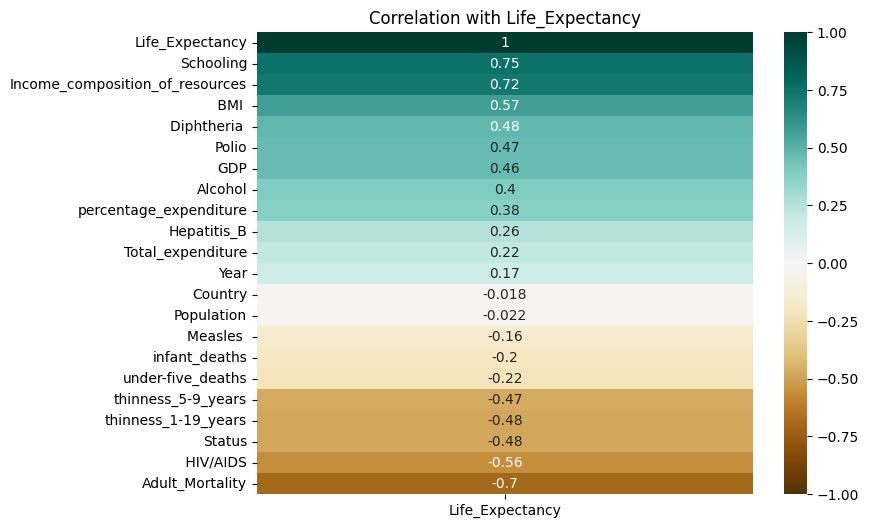

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Filter the correlation matrix for the target column
target_column = 'Life_Expectancy'
target_correlation = correlation_matrix[target_column].sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(target_correlation.to_frame(), annot=True,cmap='BrBG', vmin=-1, vmax=1)
plt.title(f'Correlation with {target_column}')
plt.show()

In [ ]:
#Country and population have low correlation with the Life_expectancy so dropping them
#hepatitis_B has large number of "Nan" values so dropping it
#Life_expectancy is non dependant variable so dropping it
df = df.drop(columns = [ 'Country' ,'Population' ,'Hepatitis_B' ], axis = 1)


In [ ]:
# filling NaN values using the mean() function

mean = df.mean()
df.fillna(mean, inplace=True)

In [ ]:
df.isna().sum()

Year                               0
Status                             0
Life_Expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Measles                            0
 BMI                               0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
thinness_1-19_years                0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

## **LINEAR REGRESSION** ||
Predicting "Life_Expectancy"


In [ ]:
x = df.drop(columns=["Life_Expectancy"])
y = df["Life_Expectancy"]

In [ ]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)


In [ ]:
# Evaluate the model

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.812023456513509


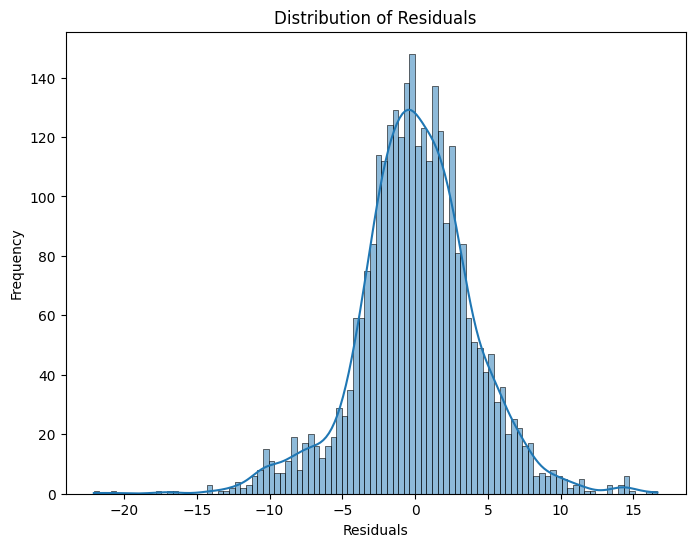

In [ ]:
# Obtaining the residuals
residuals = y - lin_reg.predict(x)

# Plot the distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=100, edgecolor='black',kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

## **Assignment - 2**

## **K-nn Regression**

In [ ]:
df.head(2)

,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,2015,1,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,2014,1,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x = df.drop(columns=["Life_Expectancy"])
y = df["Life_Expectancy"]


In [ ]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
# Initialize the k-NN regressor with k=3
knn_regressor = KNeighborsRegressor(n_neighbors=3)

# Fit the k-NN regressor to the training data
knn_regressor.fit(x_train, y_train)

# Predict on the test data
y_pred = knn_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 9.327153962836556
R2 Score: 0.9008228459509786


Comparing results of Multiple Linear regression and Knn

Based on the R2 scores, the k-NN regression model with an R2 score of 0.90 outperforms the multiple linear regression model with an R2 score of 0.82 in terms of capturing and explaining the variability in the life expectancy prediction data.

The k-NN model considers the similarity of the k nearest neighbors to make predictions, which might result in better performance when there are non-linear relationships or complex patterns in the data.

An R2 score of 0.90 indicates a higher level of explained variance and suggests that the k-NN regression model has a stronger predictive ability for the given data.


## **LOGISTIC REGRESSION** || Predicting "Status" (Developed/Developing) of the country

In [ ]:
df.head(2)

,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,2015,1,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,2014,1,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0


In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

x = df.drop(columns=["Status"])
y = df["Status"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# Create a logistic regression model
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(x_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(x_test)

#print classification report for model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       111
           1       0.93      0.96      0.94       475

    accuracy                           0.91       586
   macro avg       0.86      0.82      0.84       586
weighted avg       0.90      0.91      0.90       586



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Finding threshold that maximizes Recall and F1-score

In [ ]:
from sklearn.metrics import precision_recall_curve

#obtaining predicted probabilities
y_pred_prob = log_reg.predict_proba(x_test)[:, 1]

# Computing precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Finding the threshold that maximizes recall
max_recall_threshold = thresholds[np.argmax(recall)]

# Calculating F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

#finding the threshold that maximizes F1 score
max_f1_threshold = thresholds[np.argmax(f1_scores)]

In [ ]:
print("Threshold that maximizes recall : ",max_recall_threshold)
print("Threshold that maximizes f1 score : ",max_f1_threshold)

Threshold that maximizes recall :  0.028029589959538023
Threshold that maximizes f1 score :  0.43419605005171874


## **Assignment - 3**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error



In [ ]:
df.head(2)

,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,2015,1,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,2014,1,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0


In [ ]:
x = df.drop(columns=["Life_Expectancy"])
y = df["Life_Expectancy"]

from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Finding error from all regression models on the data

In [ ]:

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
lin_reg_mse = mean_squared_error(y_test, y_pred)
lin_reg_r2 = r2_score(y_test, y_pred)


# K-NN Regression
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(x_train, y_train)
y_pred = knn_reg.predict(x_test)
Knn_mse = mean_squared_error(y_test, y_pred)
Knn_r2 = r2_score(y_test, y_pred)


# Decision Tree Regression
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)
y_pred = tree_reg.predict(x_test)
tree_reg_mse = mean_squared_error(y_test, y_pred)
tree_reg_r2 = r2_score(y_test, y_pred)

# Random Forest Regression
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)
y_pred = tree_reg.predict(x_test)
forest_reg_mse = mean_squared_error(y_test, y_pred)
forest_reg_r2 = r2_score(y_test, y_pred)


print("linear_regression          mse : {:.3f}  r2_Score : {:.3f}".format(lin_reg_mse,lin_reg_r2))
print("Knn_regression             mse : {:.3f}  r2_Score : {:.3f}".format(Knn_mse,Knn_r2))
print("Decision_tree_regression   mse : {:.3f}  r2_Score : {:.3f}".format(tree_reg_mse,tree_reg_r2))
print("Random_forest_regression   mse : {:.3f}  r2_Score : {:.3f}".format(forest_reg_mse,forest_reg_r2))


linear_regression          mse : 17.391  r2_Score : 0.812
Knn_regression             mse : 7.478  r2_Score : 0.919
Decision_tree_regression   mse : 8.207  r2_Score : 0.911
Random_forest_regression   mse : 8.207  r2_Score : 0.911


## Hyper Parameter Tuning and finding best parameters

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Parameter grid for Linear Regression
linear_reg_param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Parameter grid for K-NN Regression
knn_reg_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Parameter grid for Decision Tree
tree_reg_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter': ['best', 'random']
}

# Parameter grid for Random Forest
forest_reg_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a pipeline of parameter grids
param_grid_pipeline = [
    (LinearRegression(), linear_reg_param_grid),
    (KNeighborsRegressor(), knn_reg_param_grid),
    (DecisionTreeRegressor(), tree_reg_param_grid),
    (RandomForestRegressor(), forest_reg_param_grid)
]

# Loop through the pipeline and perform hyperparameter tuning
for model, param_grid in param_grid_pipeline:
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    best_model_error = mean_squared_error(y_test, best_model.predict(x_test))
    print("Best {} MSE: {:.3f}  r2_Score: {:.3f}".format(model.__class__.__name__,best_model_error,r2_score(y_test, best_model.predict(x_test))))
    print("Best", model.__class__.__name__, "Parameters:", grid_search.best_params_)


Best LinearRegression MSE: 17.391  r2_Score: 0.812
Best LinearRegression Parameters: {'fit_intercept': True, 'positive': False}
Best KNeighborsRegressor MSE: 6.934  r2_Score: 0.925
Best KNeighborsRegressor Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Best DecisionTreeRegressor MSE: 7.636  r2_Score: 0.918
Best DecisionTreeRegressor Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best RandomForestRegressor MSE: 3.515  r2_Score: 0.962
Best RandomForestRegressor Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


# Sampling different test set

In [ ]:
x = df.drop(columns=["Life_Expectancy"])
y = df["Life_Expectancy"]

from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=56)

## Finding error from all regression models with best parameters on the data

In [ ]:

# Linear Regression
lin_reg = LinearRegression(fit_intercept= True, positive= False)
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
lin_reg_mse = mean_squared_error(y_test, y_pred)
lin_reg_r2 = r2_score(y_test, y_pred)


# K-NN Regression
knn_reg = KNeighborsRegressor(algorithm= 'auto' , n_neighbors = 5, weights = 'distance')
knn_reg.fit(x_train, y_train)
y_pred = knn_reg.predict(x_test)
Knn_mse = mean_squared_error(y_test, y_pred)
Knn_r2 = r2_score(y_test, y_pred)


# Decision Tree Regression
tree_reg = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 2, min_samples_split = 10, splitter = 'best')
tree_reg.fit(x_train, y_train)
y_pred = tree_reg.predict(x_test)
tree_reg_mse = mean_squared_error(y_test, y_pred)
tree_reg_r2 = r2_score(y_test, y_pred)

# Random Forest Regression
forest_reg = RandomForestRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300)
forest_reg.fit(x_train, y_train)
y_pred = tree_reg.predict(x_test)
forest_reg_mse = mean_squared_error(y_test, y_pred)
forest_reg_r2 = r2_score(y_test, y_pred)


print("linear_regression          mse : {:.3f}  r2_Score : {:.3f}".format(lin_reg_mse,lin_reg_r2))
print("Knn_regression             mse : {:.3f}  r2_Score : {:.3f}".format(Knn_mse,Knn_r2))
print("Decision_tree_regression   mse : {:.3f}  r2_Score : {:.3f}".format(tree_reg_mse,tree_reg_r2))
print("Random_forest_regression   mse : {:.3f}  r2_Score : {:.3f}".format(forest_reg_mse,forest_reg_r2))


linear_regression          mse : 17.766  r2_Score : 0.804
Knn_regression             mse : 9.010  r2_Score : 0.900
Decision_tree_regression   mse : 6.655  r2_Score : 0.926
Random_forest_regression   mse : 6.655  r2_Score : 0.926
